# TP3 Random fores
Dejonghe Rafael et Reme Raphael

## Question de maths:

Cela ne fonctionne pas si on prend le classifieur donné dans l'énoncé.

Néanmoins en prenant $F_D^L(X) = \sum_l \mathbb{1}_\mathbb{R^+}(f_D^l(X))$ qui n'est pas un classifieur binaire, on peut en construire un en comparant $F_D^L(X)$ à $\frac{L}{2}$. (Le classifieur vaut 1 si $F_D^L(X)>L/2$ et 0 sinon)

Ici on sait que pour tout l, $\mathbb{P}(\mathbb{1}_\mathbb{R^+}(f_D^l(X)) = Y) = p$.

De plus on peut remarquer que peu importe la valeur de Y, pour ne pas se tromper avec notre nouveau classifieur, il faut au moins L/2 (environ, selon si L est pair ou non) $F_D^l(X)$ qui prédisent correctement Y.

Ainsi supposons que L est pair, il faut alors au moins L/2 + 1 succès parmi L variables indépendantes et identiquement distribuées, où la probabilité de succès est p. Donc on tombe bien sur un calcul de loi binomiale dans le calcul de notre probabilité de succès :

$P(succes) =  \sum_{k= L/2 +1}^L (_k^L) p^k (1-p)^{L-k}$ C'est la probabilité qu'une variable binomiale de parametre L, p soit strictement plus grande que L/2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom
rv = binom(10, 0.7)

print("Probabilité de succès avec notre nouvel estimateur pour L = 10 et p = 0.7 :\n", 1 - rv.cdf(5))


Probabilité de succès avec notre nouvel estimateur pour L = 10 et p = 0.7 :
 0.8497316674


## Q2

In [21]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor

### 1/ et 2/

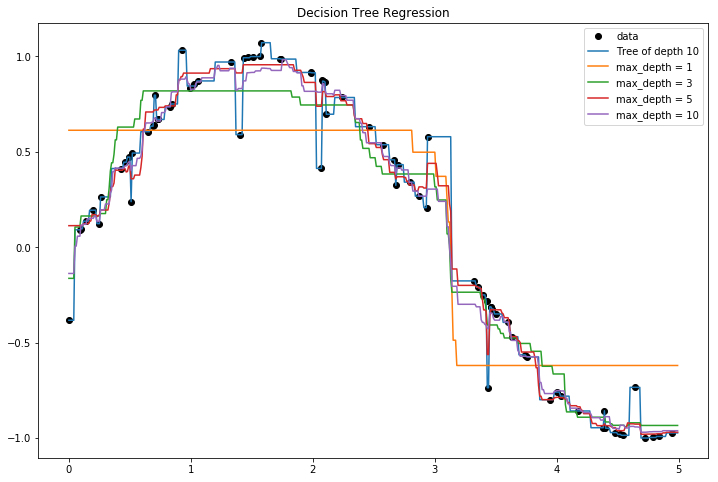

In [4]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X, y)

bagging_1 = BaggingRegressor(DecisionTreeRegressor(max_depth = 1), n_estimators = n_estimators, max_samples = 0.5)
bagging_1.fit(X, y)

bagging_3 = BaggingRegressor(DecisionTreeRegressor(max_depth = 3), n_estimators = n_estimators, max_samples = 0.5)
bagging_3.fit(X, y)

bagging_5 = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = n_estimators, max_samples = 0.5)
bagging_5.fit(X, y)

bagging_10 = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = n_estimators, max_samples = 0.5)
bagging_10.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging_1 = bagging_1.predict(X_test)
y_bagging_3 = bagging_3.predict(X_test)
y_bagging_5 = bagging_5.predict(X_test)
y_bagging_10 = bagging_10.predict(X_test)
# Plot the results

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, '-', label="Tree of depth 10")
plt.plot(X_test, y_bagging_1, '-', label="max_depth = 1")
plt.plot(X_test, y_bagging_3, '-', label="max_depth = 3")
plt.plot(X_test, y_bagging_5, '-', label="max_depth = 5")
plt.plot(X_test, y_bagging_10, '-', label="max_depth = 10")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

Ici on peut voir l'influence du parametre max_depth :

On peut observer que le bagging avec des arbres de profondeur 1 est trop limité, afin de minimiser la square loss, les arbres moyennent tous de la même manière le sinus, malgré le tirage alétoire des exemples. Il y a un net underfitting pour max_depth = 1 et le baggin n'apporte pas grand chose finalement.

Puis à mesure qu'on augmente la profondeur des arbres, on voit qu'ils sont plus performants. Notamment on peut observer que l'arbre de taille 10 est interpolant, il a appris tout le bruit et donc overfit. Mais avec le bagging ils n'apprennent que sur une partie du dataset tirée avec remise. Faire une moyenne de ses arbres interpolants permet d'éviter de trop apprendre le bruit.

Une profondeur intermédiaire semble tout de même plus apropriée (4 ou 5) pour cette exemple.

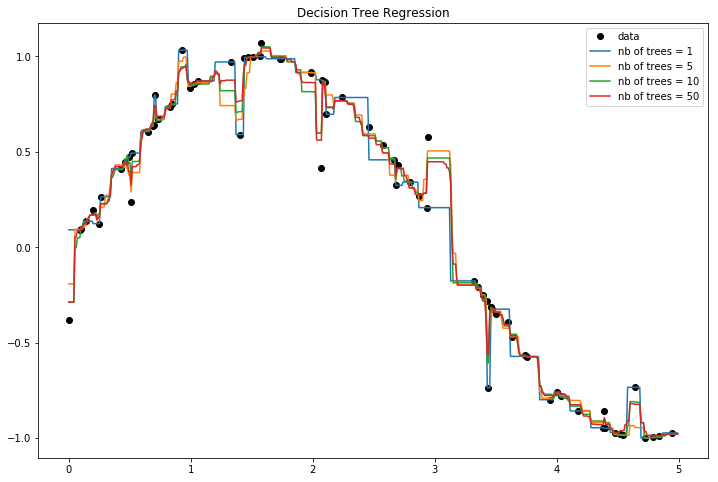

In [5]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))


bagging_1 = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = 1, max_samples = 1.0)
bagging_1.fit(X, y)

bagging_5 = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = 5, max_samples = 1.0)
bagging_5.fit(X, y)

bagging_10 = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = 10, max_samples = 1.0)
bagging_10.fit(X, y)

bagging_50 = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = 50, max_samples = 1.0)
bagging_50.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging_1 = bagging_1.predict(X_test)
y_bagging_5 = bagging_5.predict(X_test)
y_bagging_10 = bagging_10.predict(X_test)
y_bagging_50 = bagging_50.predict(X_test)
# Plot the results

plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_bagging_1, '-', label="nb of trees = 1")
plt.plot(X_test, y_bagging_5, '-', label="nb of trees = 5")
plt.plot(X_test, y_bagging_10, '-', label="nb of trees = 10")
plt.plot(X_test, y_bagging_50, '-', label="nb of trees = 50")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

Le nombre d'estimateurs utilisés permet notamment de faire baiser la variance de notre prédiction et donc de réduire notre sensibilité au bruit, surtout quand notre estimateur de base est très sensible.

Ici on a l'exemple d'arbre de profondeur 10, qui peuvent interpoler le dataset d'entrainement. Le fait d'utiliser du bootstrap permet notamment d'éviter cela. 

On remarque qu'augmenter le nombre d'estimateurs permet bien de diminuer cet effet d'interpolation.

### 3/

In [6]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text

# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth = 5)
tree.fit(X, y)

bagging = BaggingRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = n_estimators, max_samples = 0.5)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)

print("Biais d'un arbre :", np.abs(np.mean(np.sin(X_test)) - np.mean(y_tree)))
print("Biais pour le bagging :", np.abs(np.mean(np.sin(X_test)) - np.mean(y_bagging)))

print("Ecart type pour un arbre :", np.std(y_tree))
print("Ecart type pour le bagging :", np.std(y_bagging))

Biais d'un arbre : 0.012953931259580082
Biais pour le bagging : 0.01556636896789887
Ecart type pour un arbre : 0.7103133218186893
Ecart type pour le bagging : 0.6885492012931801


L'estimateur basé sur un arbre est ici plus biaisé que celui avec bagging. De plus l'écart type des estimateurs est aussi légèrement réduit avec le bagging.

### 4/

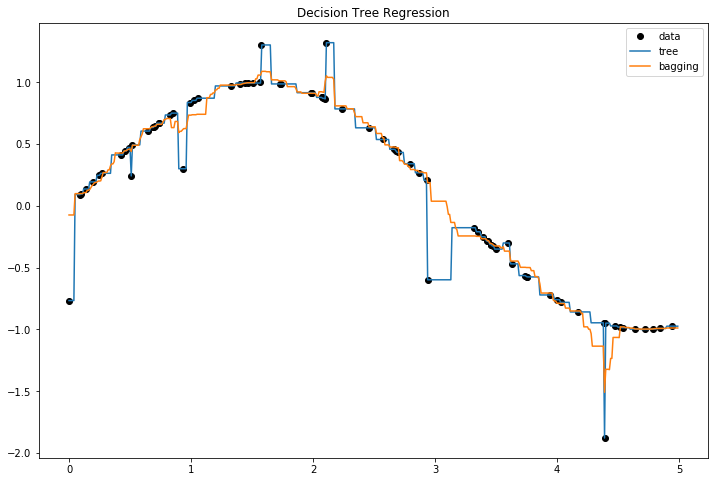

In [7]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::10] += 2 * (0.5 - rng.rand(8))
n_estimators = 10 # L in the text
tree_max_depth = 10
# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth = tree_max_depth)
tree.fit(X, y)
bagging = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = n_estimators, max_samples = 0.5)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_tree, '-', label="tree")
plt.plot(X_test, y_bagging, '-', label="bagging")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

On voit très facilement que un arbre seul de profondeur 10 overfit complètement. (problème qui apparait bien moins avec le bagging)

### 5/

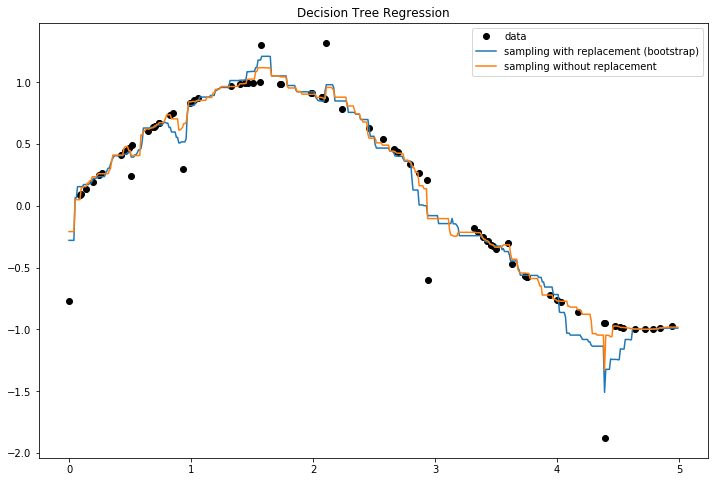

In [8]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::10] += 2 * (0.5 - rng.rand(8))
n_estimators = 10 # L in the text

# TODO define the regressor by bagging stumps
_with = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = n_estimators, max_samples = 0.5)
_with.fit(X, y)

without = BaggingRegressor(DecisionTreeRegressor(max_depth = 10), n_estimators = n_estimators, max_samples = 0.5, bootstrap = False)
without.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_with = _with.predict(X_test)
y_without = without.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="k", label="data")
plt.plot(X_test, y_with, '-', label="sampling with replacement (bootstrap)")
plt.plot(X_test, y_without, '-', label="sampling without replacement")
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

Il semble en effet que le tirage sans remise permette d'améliorer un peu le lissage du bruit.

### 6/

In [9]:
from sklearn.datasets import load_boston, load_iris, load_digits, load_diabetes
boston = load_boston()
iris = load_iris()
digits = load_digits()
diabetes = load_diabetes()

In [11]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [39]:
def CV(dataset, k, classification = True):
    """Effectue une crosse validation et compare les scores obtenus par la suite avec une svm et une random forest.
    La paramètre choisi pour la cross validation sont la profondeur et le nombre d'estimateur pour la random forest,
    et la normalisation pour la svm."""
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=0)
    
    X_folds = np.array_split(X_train, k)
    y_folds = np.array_split(y_train, k)
    
    C_s = [i * 10**j for j in range(-5,3) for i in range(1,10,2)]
    nb_of_estimators = list(range(1,100, 5))
    max_depths = list(range(1,30,2))
    
    best_score = 0
    best_depth = 0
    best_nb = 0
    
    for max_depth in max_depths:
        for nb in nb_of_estimators:
            if classification:
                forest = RandomForestClassifier(n_estimators = nb, max_depth = max_depth)
            else:
                forest = RandomForestRegressor(n_estimators = nb, max_depth = max_depth)
            score = 0
            for i in range(k):
                X = np.vstack(X_folds[:i] + X_folds[i+1:])
                y = np.hstack(y_folds[:i] + y_folds[i+1:])
                
                forest.fit(X, y)
                score += forest.score(X_folds[i], y_folds[i])
            
            if best_score < score:
                best_score = score
                best_depth = max_depth
                best_nb = nb
    
    best_score = 0
    best_C = 0
    
    for C in C_s:
        if classification:
            svm = SVC(C = C, gamma = 'auto')
        else:
            svm = SVR(C = C, gamma = 'auto')
        score = 0
        for i in range(7):
            X = np.vstack(X_folds[:i] + X_folds[i+1:])
            y = np.hstack(y_folds[:i] + y_folds[i+1:])
                
            svm.fit(X, y)
            score += svm.score(X_folds[i], y_folds[i])
            
        if best_score < score:
            best_score = score
            best_C = C 
    
    if classification:
        forest = RandomForestClassifier(n_estimators = best_nb, max_depth = best_depth)
        svm = SVC(C = best_C, gamma = 'auto')
    else:
        forest = RandomForestRegressor(n_estimators = best_nb, max_depth = best_depth)
        svm = SVR(C= best_C, gamma = 'auto')
        
    forest.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    print("Score pour Random forest :", forest.score(X_test, y_test))
    print("Score pour SVM :", svm.score(X_test, y_test))
    

In [40]:
print("Iris dataset, classification :")
print("------------------------------")
CV(iris, 7)
print("\n")

print("digits dataset, classification :")
print("--------------------------------")
CV(digits, 7)
print("\n")

print("Boston dataset, classification :")
print("--------------------------------")
CV(boston, 7, False)
print("\n")

print("Diabetes dataset, classification :")
print("--------------------------------")
CV(diabetes, 7, False)
print("\n")

Iris dataset, classification :
------------------------------
Score pour Random forest : 0.9666666666666667
Score pour SVM : 1.0


digits dataset, classification :
--------------------------------
Score pour Random forest : 0.9777777777777777
Score pour SVM : 0.4


Boston dataset, classification :
--------------------------------
Score pour Random forest : 0.7465936941920894
Score pour SVM : 0.0963508715985073


Diabetes dataset, classification :
--------------------------------
Score pour Random forest : 0.28325811022960756
Score pour SVM : 0.35578560074156146




### 7/

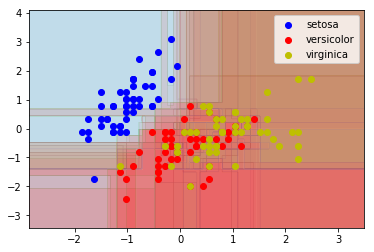

In [18]:
# Parameters
n_estimators = 10
plot_colors = "bry"
plot_step = 0.02
# Load data

X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
    # TODO use predict to obtain the probabilities you will store in Z
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

### 8/

In [37]:
k = 6

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.2, random_state=0)
    
X_folds = np.array_split(X_train, k)
y_folds = np.array_split(y_train, k)

max_depths = list(range(1,30))
    
best_score_forest = 0
best_score_tree = 0
best_depth_forest = 0
best_depth_tree = 0

# Choix arbitraire du nombre d'estimateurs (on pourrait l'integrer dans la CV comme précédemment)
nb_estimators = 10


for max_depth in max_depths:
    forest = RandomForestClassifier(n_estimators = nb_estimators, max_depth = max_depth)
    tree = DecisionTreeClassifier(max_depth = max_depth)
    score_tree = 0
    score_forest = 0
    for i in range(k):
        X = np.vstack(X_folds[:i] + X_folds[i+1:])
        y = np.hstack(y_folds[:i] + y_folds[i+1:])
                
        forest.fit(X, y)
        tree.fit(X, y)
        
        score_forest += forest.score(X_folds[i], y_folds[i])
        score_tree += tree.score(X_folds[i], y_folds[i])
            
    if best_score_forest < score_forest:
        best_score_forest = score_forest
        best_depth_forest = max_depth
    if best_score_tree < score_tree:
        best_score_tree = score_tree
        best_depth_tree = max_depth
      
    

forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = best_depth_forest)
tree = DecisionTreeClassifier(max_depth = best_depth_tree)
        
forest.fit(X_train, y_train)
tree.fit(X_train, y_train)
    
print("Score pour Random forest :", forest.score(X_test, y_test))
print("Score pour un arbre classique :", tree.score(X_test, y_test))

Score pour Random forest : 0.7333333333333333
Score pour un arbre classique : 0.6


### 9/

In [32]:
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

Score pour Random forest : 0.6
Score pour extra trees : 0.5666666666666667


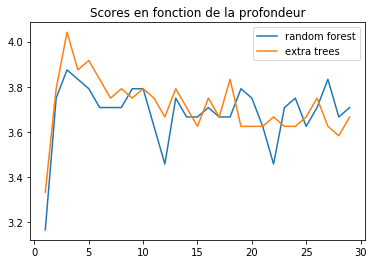

In [41]:
## IRIS : CLASSIFICATION

k = 5

X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:2], iris.target, test_size=0.2, random_state=0)
    
X_folds = np.array_split(X_train, k)
y_folds = np.array_split(y_train, k)

max_depths = list(range(1,30))
scores_forest = []
scores_trees = []

best_score_forest = 0
best_score_trees = 0
best_depth_forest = 0
best_depth_trees = 0

# Choix arbitraire du nombre d'estimateurs (on pourrait l'integrer dans la CV comme précédemment)
nb_estimators = 10


for max_depth in max_depths:
    forest = RandomForestClassifier(n_estimators = nb_estimators, max_depth = max_depth)
    trees = ExtraTreesClassifier(n_estimators = nb_estimators, max_depth = max_depth)
    score_trees = 0
    score_forest = 0
    for i in range(k):
        X = np.vstack(X_folds[:i] + X_folds[i+1:])
        y = np.hstack(y_folds[:i] + y_folds[i+1:])
                
        forest.fit(X, y)
        trees.fit(X, y)
        
        score_forest += forest.score(X_folds[i], y_folds[i])
        score_trees += trees.score(X_folds[i], y_folds[i])
    
    scores_forest.append(score_forest)
    scores_trees.append(score_trees)
    
    if best_score_forest < score_forest:
        best_score_forest = score_forest
        best_depth_forest = max_depth
    if best_score_trees < score_trees:
        best_score_trees = score_trees
        best_depth_trees = max_depth
      
    

forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = best_depth_forest)
trees = ExtraTreesClassifier(n_estimators = n_estimators, max_depth = best_depth_trees)
        
forest.fit(X_train, y_train)
trees.fit(X_train, y_train)
    
print("Score pour Random forest :", forest.score(X_test, y_test))
print("Score pour extra trees :", trees.score(X_test, y_test))

plt.plot(max_depths, scores_forest, label = "random forest")
plt.plot(max_depths, scores_trees, label = "extra trees")
plt.title("Scores en fonction de la profondeur")
plt.legend()
plt.show()

On voit bien que la profondeur permet de s'améliorer au début. Mais qu'après elle permet l'averfitting et n'est donc plus un avantage !

Score pour Random forest : 0.7524125721583704
Score pour extra trees : 0.7316606559907328


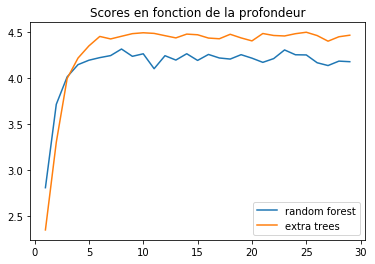

In [43]:
# BOSTON : REGRESSION

k = 5

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)
    
X_folds = np.array_split(X_train, k)
y_folds = np.array_split(y_train, k)

max_depths = list(range(1,30))
scores_forest = []
scores_trees = []

best_score_forest = 0
best_score_trees = 0
best_depth_forest = 0
best_depth_trees = 0

# Choix arbitraire du nombre d'estimateurs (on pourrait l'integrer dans la CV comme précédemment)
nb_estimators = 10


for max_depth in max_depths:
    forest = RandomForestRegressor(n_estimators = nb_estimators, max_depth = max_depth)
    trees = ExtraTreesRegressor(n_estimators = nb_estimators, max_depth = max_depth)
    score_trees = 0
    score_forest = 0
    for i in range(k):
        X = np.vstack(X_folds[:i] + X_folds[i+1:])
        y = np.hstack(y_folds[:i] + y_folds[i+1:])
                
        forest.fit(X, y)
        trees.fit(X, y)
        
        score_forest += forest.score(X_folds[i], y_folds[i])
        score_trees += trees.score(X_folds[i], y_folds[i])
            
    
    scores_forest.append(score_forest)
    scores_trees.append(score_trees)
    
    if best_score_forest < score_forest:
        best_score_forest = score_forest
        best_depth_forest = max_depth
    if best_score_trees < score_trees:
        best_score_trees = score_trees
        best_depth_trees = max_depth
      
    

forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = best_depth_forest)
trees = ExtraTreesRegressor(n_estimators = n_estimators, max_depth = best_depth_trees)
        
forest.fit(X_train, y_train)
trees.fit(X_train, y_train)
    
print("Score pour Random forest :", forest.score(X_test, y_test))
print("Score pour extra trees :", trees.score(X_test, y_test))

plt.plot(max_depths, scores_forest, label = "random forest")
plt.plot(max_depths, scores_trees, label = "extra trees")
plt.title("Scores en fonction de la profondeur")
plt.legend()
plt.show()